# 
Задание: объекты культурного наследия России
Изучите набор данных по объектам культурного наследия России (в виде gz-архива):
https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz
и постройте фоновую картограмму по количеству объектов в каждом регионе России, используя гео-данные
https://video.ittensive.com/python-advanced/russia.json
Выведите для каждого региона количество объектов в нем.
Посчитайте число объектов культурного наследия в Татарстане.
Чему равно число объектов культурного наследия в Алтайском крае? 4480

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


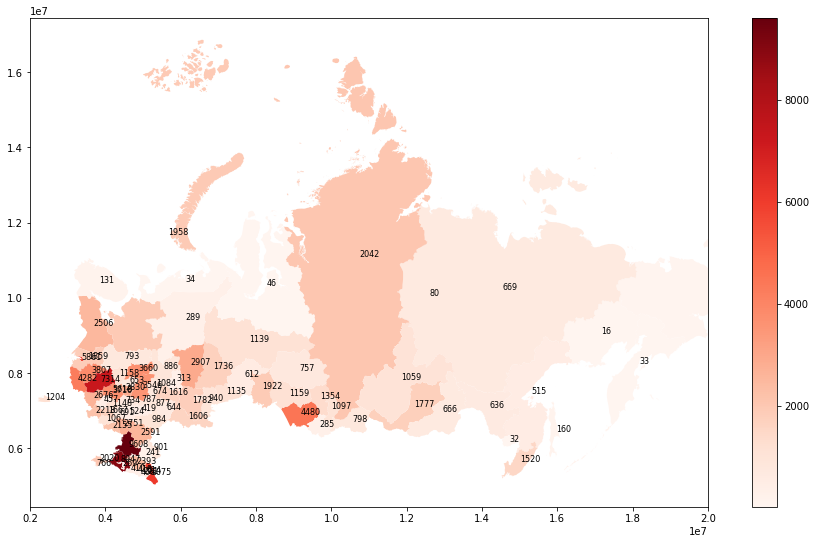

11    4480
Name: Объект, dtype: int64


In [2]:
#https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz
#https://video.ittensive.com/python-advanced/russia.json
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd 
import pandas as pd
import descartes

data = pd.read_csv("data-44-structure-4.csv.gz", usecols=["Объект","Регион"])
data["Регион"] = data["Регион"].str.upper()
data = data.groupby("Регион").count()
#print (data.index.values)

geo = gpd.read_file("russia.json")
geo = geo.to_crs({"init": 'epsg:3857'})
geo["NL_NAME_1"] = geo["NL_NAME_1"].str.upper()
geo = geo.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА",
    "РЕСПУБЛИКА АДЫГЕЯ": "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)",
    "ЧУВАШСКАЯ РЕСПУБЛИКА": "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ",
    "РЕСПУБЛИКА МАРИЙ-ЭЛ": "РЕСПУБЛИКА МАРИЙ ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН": "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)"
})
geo = pd.merge(left=geo, right=data,
              left_on="NL_NAME_1", right_on="Регион", how="left")
#print (geo[geo["Объект"].isnull()])
fig = plt.figure(figsize=(16,9))
area = plt.subplot(1, 1, 1)
geo.plot(ax=area, legend=True, column="Объект", cmap="Reds")
area.set_xlim(2e6, 2e7)
for _, region in geo.iterrows():
    area.annotate(region["Объект"],
                 xy=(region.geometry.centroid.x,
                    region.geometry.centroid.y), fontsize=8)
plt.show()
print (geo[geo["NL_NAME_1"] == "АЛТАЙСКИЙ КРАЙ"]["Объект"])